### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [32]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [33]:
# Load Data Viz Pkgs
import seaborn as sns

In [34]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [35]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw_scaled (1).csv")

In [37]:
df.head()

,Emotion,Text
0,fear,!!!1! Merry &amp; a Happy New ! mediale...
1,anger,#SAD #LONELY all of those you can find down...
2,fear,Infiltration in our lives. The illusion of ...
3,fear,Infiltration in our lives. The illusion of ...
4,fear,Infiltration in our lives. The illusion of ...


In [38]:
# Value Counts
df['Emotion'].value_counts()

joy         7499
sadness     6722
fear        5410
anger       5299
surprise    4062
neutral     2253
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

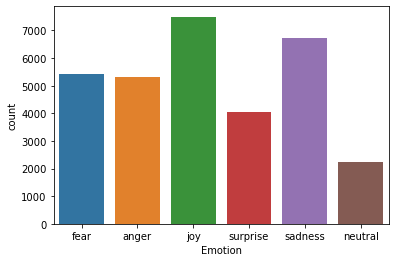

In [39]:
# Plot
sns.countplot(x='Emotion',data=df)

In [40]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [41]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [42]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [43]:
df

,Emotion,Text,Clean_Text
0,fear,!!!1! Merry &amp; a Happy New ! mediale...,!!!1! Merry &amp; Happy New ! mediale #mindfuc...
1,anger,#SAD #LONELY all of those you can find down...,#SAD #LONELY find profile! enjoy ! -__-
2,fear,Infiltration in our lives. The illusion of ...,Infiltration lives. illusion accept political ...
3,fear,Infiltration in our lives. The illusion of ...,Infiltration lives. illusion accept political ...
4,fear,Infiltration in our lives. The illusion of ...,Infiltration lives. illusion accept political ...
...,...,...,...
31240,anger,#NAME?,#NAME?
31241,fear,#NAME?,#NAME?
31242,joy,#NAME?,#NAME?
31243,sadness,#NAME?,#NAME?


In [44]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [64]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.17,random_state=100)

In [65]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
#x_train_n = min_max_scaler.fit_transform(x_train)
#y_train_n = min_max_scaler.fit_transform(y_train)

In [66]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [67]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='lbfgs', max_iter=10000))])

In [68]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=10000))])

In [69]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=10000))])

In [70]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6349774096385542

In [71]:
# Check Accuracy
pipe_lr.score(x_train,y_train)

0.8934947749971079

In [72]:
# Make A Prediction
ex1 = "Im so sad"

In [73]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [74]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.03219246, 0.01172971, 0.02458742, 0.01055246, 0.91537634,
        0.00556161]])

In [75]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [76]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_09_june_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()